In [10]:
import pandas as pd

In [11]:
data=pd.read_csv('C:/Users/DELL/OneDrive/Documents/data science asignments/KNN/KNN/Zoo.csv')

1. Distribution of Animal Types

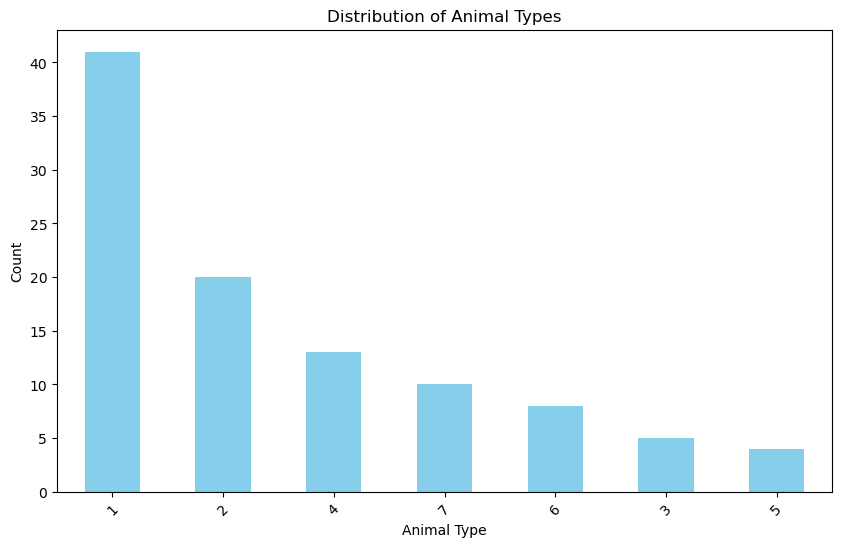

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset


# Count the occurrences of each type
type_counts = data['type'].value_counts()

# Create a bar chart
plt.figure(figsize=(10,6))
type_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Animal Types')
plt.xlabel('Animal Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


2. Correlation Heatmap
A heatmap can be created to visualize correlations between numerical features. This will help identify any strong relationships.

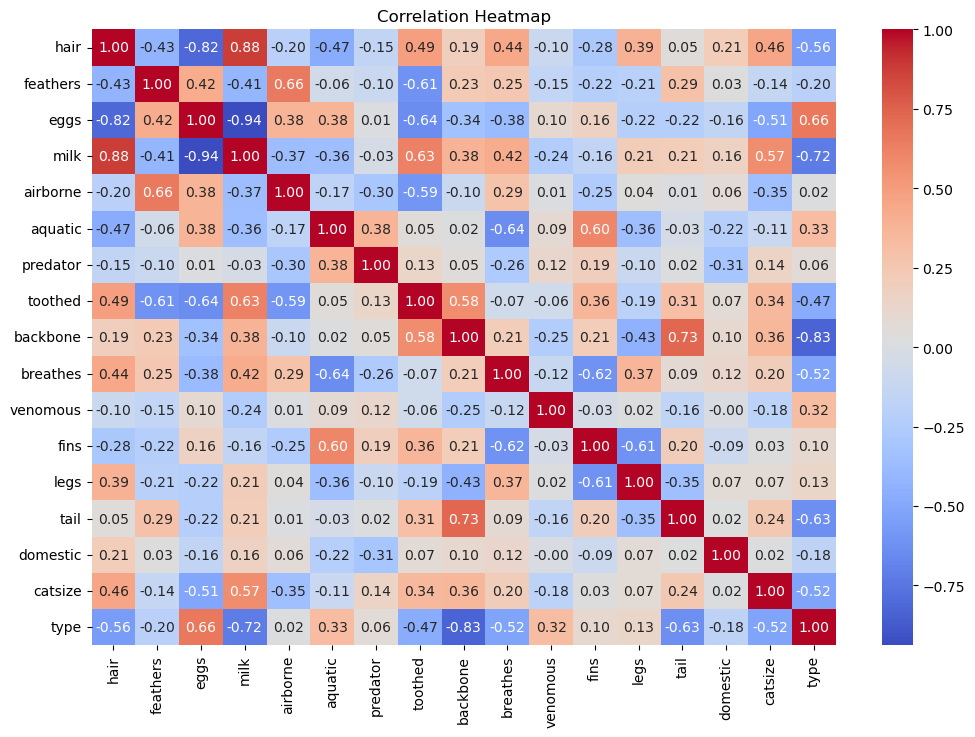

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Drop non-numeric columns for correlation analysis
numeric_data = data.select_dtypes(include=['int64', 'float64'])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


3. Pair Plot for Feature Relationships
A pair plot can be used to visualize relationships between different features based on animal types.

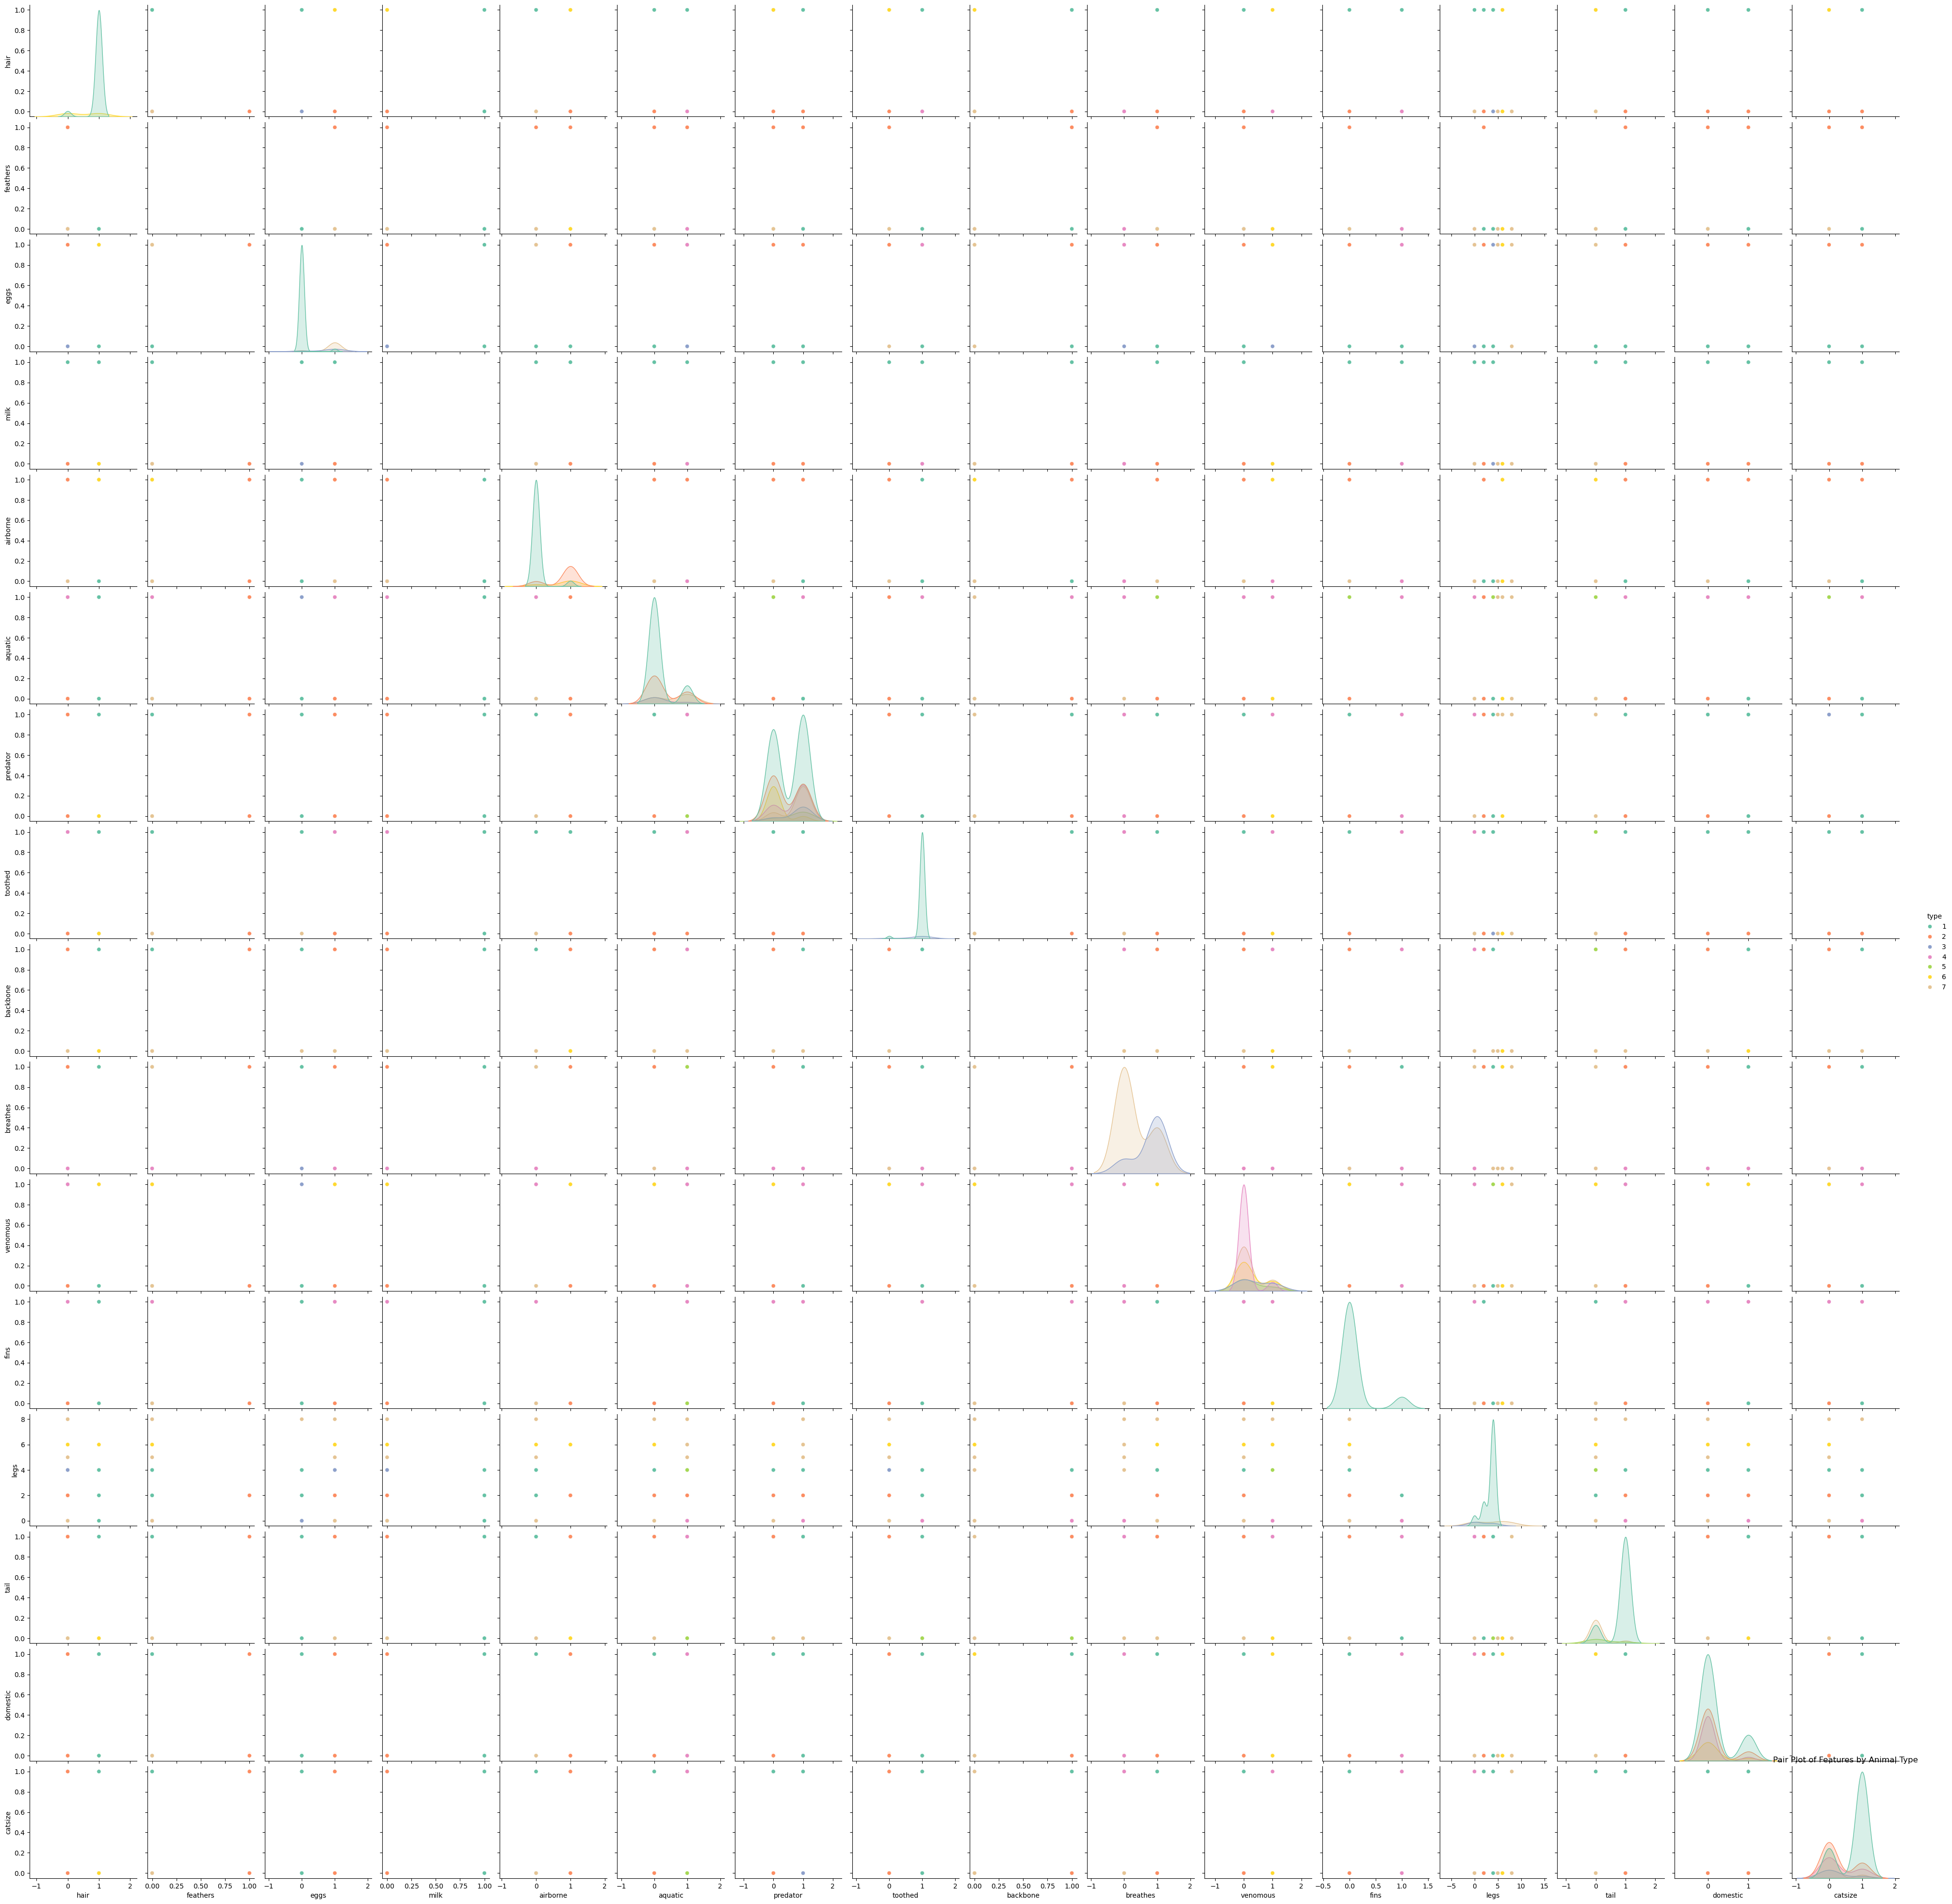

In [14]:
# Create a pair plot
sns.pairplot(data, hue='type', palette='Set2')
plt.title('Pair Plot of Features by Animal Type')
plt.show()


Summary of Findings
From these visualizations:
The bar chart shows which animal types are most common in the dataset.
The correlation heatmap reveals how features like legs and various binary attributes relate to one another.
The pair plot provides insights into how different features interact across various animal types.
These visual analyses provide a foundational understanding of the dataset's structure and relationships among variables. Next steps would involve preprocessing the data by handling missing values and outliers before proceeding with further tasks in the analysis pipeline

Code to Check for Missing Values

In [15]:
import pandas as pd

# Check for missing values
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])


Series([], dtype: int64)


In [16]:
data = data.dropna()


Calculate IQR and Identify Outliers

In [19]:
# Calculate IQR for numeric columns
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = ((numeric_data < lower_bound) | (numeric_data > upper_bound)).sum()
print("Outliers Detected:\n", outliers[outliers > 0])


Outliers Detected:
 feathers    20
airborne    24
backbone    18
breathes    21
venomous     8
fins        17
legs         2
domestic    13
dtype: int64


Handle Outliers

In [20]:
data_cleaned = data[~((numeric_data < lower_bound) | (numeric_data > upper_bound)).any(axis=1)]


Cap Outliers:

In [21]:
for col in numeric_data.columns:
    data[col] = data[col].clip(lower=lower_bound[col], upper=upper_bound[col])


Summary of Preprocessing Steps
Missing Values: Checked and handled (either dropped or filled).
Outlier Detection: Identified using the IQR method.
Outlier Handling: Either removed or capped based on your preference.
This preprocessing will ensure that your dataset is clean and ready for further analysis, such as splitting into training and testing sets or applying machine learning algorithms. If you have specific requirements for handling missing values or outliers, please let me know!

Split the Dataset

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split


# Separate features and target variable
X = data.drop(columns=['animal name', 'type'])  # Features
y = data['type']  # Target variable

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display the sizes of the resulting datasets
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")


Training set size: 80 samples
Testing set size: 21 samples


Loading Data: The dataset is loaded from Zoo.csv.
Separating Features and Target: The features are stored in X, and the target variable (type) is stored in y. The columns animal name and type are excluded from features since they are not numerical attributes used for modeling.
Splitting the Data: The train_test_split function splits the data into training (80%) and testing (20%) sets. The stratify=y parameter ensures that both sets have a similar distribution of classes as in the original dataset.
Output Sizes: Finally, it prints out the number of samples in each set for verification.

Implement the K-Nearest Neighbours algorithm using a machine learning library like scikit-learn On training dataset

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


# Separate features and target variable
X = data.drop(columns=['animal name', 'type'])  # Features
y = data['type']  # Target variable

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Create a KNN classifier instance
knn = KNeighborsClassifier(n_neighbors=5)  # You can choose a different value for k

# Fit the model to the training data
knn.fit(X_train, y_train)

print("KNN model trained successfully.")


KNN model trained successfully.


Loading Data: The dataset is loaded from Zoo.csv.
Separating Features and Target: The features are stored in X, and the target variable (type) is stored in y. The columns animal name and type are excluded from features since they are not numerical attributes used for modeling.
Splitting Data: The dataset is split into training (80%) and testing (20%) sets using train_test_split. The stratify=y parameter ensures that both sets have a similar distribution of classes.
Creating KNN Classifier: An instance of KNeighborsClassifier is created with a specified number of neighbors (k). You can adjust this value based on your needs.
Fitting the Model: The model is trained using the training dataset with knn.fit(X_train, y_train).

5. Choose an appropriate distance metric and value for K.

In [25]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Create a list of potential k values
k_values = range(1, 21)

# Store the mean accuracy for each k
mean_accuracies = []

# Reduce n_splits to 3 for cross-validation
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')  # Using Euclidean distance
    scores = cross_val_score(knn, X_train, y_train, cv=3)  # Using 3-fold cross-validation
    mean_accuracies.append(scores.mean())

# Find the best k
best_k = k_values[np.argmax(mean_accuracies)]
print(f"Best value for K: {best_k}")


Best value for K: 3


To choose an appropriate distance metric and value for 
K
K in the K-Nearest Neighbors (KNN) algorithm, we need to consider the nature of the data and the problem we are solving. Here’s a structured approach to making these choices:
1. Choosing a Distance Metric
The distance metric is crucial as it determines how the similarity between data points is calculated. Common distance metrics include:
Euclidean Distance: Suitable for continuous numerical data, calculates the straight-line distance between two points in Euclidean space.
Manhattan Distance: Useful for high-dimensional spaces and when dealing with categorical variables, calculates the sum of absolute differences.
Minkowski Distance: A generalization of both Euclidean and Manhattan distances, defined by a parameter 
p
p. For 
p
=
2
p=2, it is Euclidean, and for 
p
=
1
p=1, it is Manhattan.
Recommended Metric
Given that the dataset consists of various binary attributes (e.g., hair, feathers, etc.) along with some numerical features (e.g., legs), Euclidean distance is a good starting point because it works well with mixed data types and is commonly used in KNN implementations.
2. Choosing the Value for 
K
K
The value of 
K
K represents the number of nearest neighbors to consider when making predictions. Choosing an appropriate 
K
K is essential for model performance:
Small Values of 
K
K: A smaller 
K
K (e.g., 1 or 3) can lead to a model that is sensitive to noise in the data, potentially resulting in overfitting.
Large Values of 
K
K: A larger 
K
K can smooth out predictions but may overlook local patterns in the data.

6. Evaluate the classifier's performance on the testing set using accuracy, precision, recall, and F1-score metrics.

To evaluate the K-Nearest Neighbors (KNN) classifier's performance on the testing set, we will calculate the following metrics:
Accuracy: The proportion of correctly classified instances among the total instances.
Precision: The ratio of true positive predictions to the total predicted positives.
Recall (Sensitivity): The ratio of true positive predictions to the actual positives.
F1-Score: The harmonic mean of precision and recall.

In [28]:
# Check class distribution in the training and testing sets
print("Training set class distribution:\n", y_train.value_counts())
print("Testing set class distribution:\n", y_test.value_counts())


Training set class distribution:
 type
1    33
2    16
4    10
7     8
6     6
3     4
5     3
Name: count, dtype: int64
Testing set class distribution:
 type
1    8
2    4
4    3
6    2
7    2
5    1
3    1
Name: count, dtype: int64


In [29]:
# Evaluate the classifier's performance with zero_division handling
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Accuracy: 0.90
Precision: 0.89
Recall: 0.90
F1 Score: 0.88


Explanation of Adjustments
Class Distribution: Checking the distribution helps you understand if certain classes are underrepresented, which might require you to adjust your training data or model parameters.
Zero Division Handling: By setting zero_division=0, you ensure that if a metric cannot be calculated (due to no predicted samples), it will return 0 instead of raising an error or warning.

7. Visualize the decision boundaries of the classifier.

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\DELL\AppData\Local\Temp\ipykernel_16832\962775940.py:36: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test['hair'], X_test['legs'], c='red', edgecolors='k', marker='x', label='Testing Data')


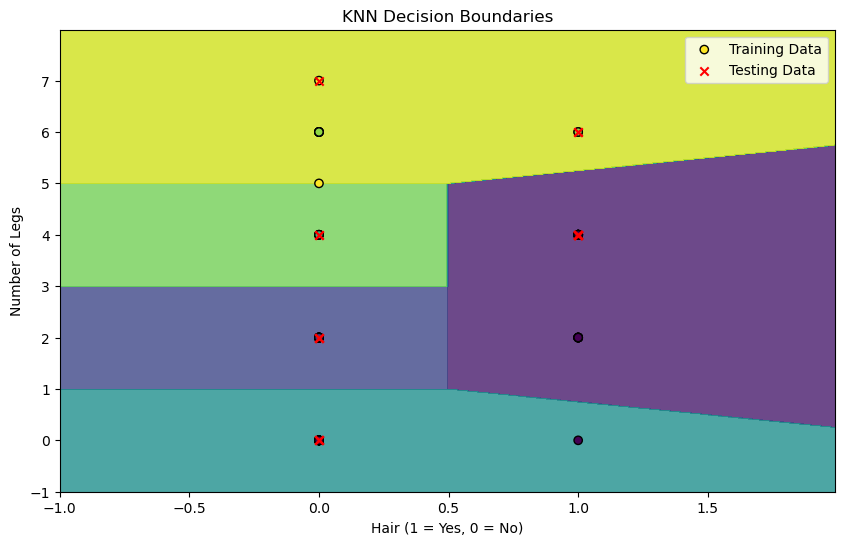

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


# Select two features for visualization (e.g., 'hair' and 'legs')
X = data[['hair', 'legs']]
y = data['type']

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Create a KNN classifier instance
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model to the training data
knn.fit(X_train, y_train)

# Create a mesh grid for plotting decision boundaries
x_min, x_max = X['hair'].min() - 1, X['hair'].max() + 1
y_min, y_max = X['legs'].min() - 1, X['legs'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict class labels for each point in the mesh grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_train['hair'], X_train['legs'], c=y_train.astype('category').cat.codes,
            edgecolors='k', marker='o', label='Training Data')
plt.scatter(X_test['hair'], X_test['legs'], c='red', edgecolors='k', marker='x', label='Testing Data')
plt.title('KNN Decision Boundaries')
plt.xlabel('Hair (1 = Yes, 0 = No)')
plt.ylabel('Number of Legs')
plt.legend()
plt.show()


Explanation
Feature Selection: We select hair and legs as the two features for visualization. You can choose other features based on your analysis.
Data Splitting: The dataset is split into training and testing sets.
Model Training: The KNN classifier is created and fitted to the training data.
Mesh Grid Creation: A mesh grid is created to cover the range of values for both selected features.
Prediction: The model predicts class labels for each point in the mesh grid.
Plotting: The decision boundaries are plotted using contourf, and training/testing points are displayed.
Visualization Interpretation
The contour plot represents different regions classified into different animal types based on hair and legs.
Training data points are shown with circles (colored by their respective classes), while testing data points are marked with crosses.

Interview Questions:


1. What are the key hyperparameters in KNN?
The key hyperparameters in the K-Nearest Neighbors (KNN) algorithm include:
n_neighbors: This is the most critical hyperparameter. It specifies the number of nearest neighbors to consider when making predictions. A smaller value can lead to a model that is sensitive to noise (overfitting), while a larger value can smooth out predictions but may overlook local patterns.
weights: This parameter determines how to weight the contributions of each neighbor. It can take values such as:
'uniform': All neighbors contribute equally.
'distance': Closer neighbors have more influence on the prediction than farther ones.
algorithm: This specifies the algorithm used to compute the nearest neighbors. Options include:
'auto': Automatically chooses the best algorithm based on the input data.
'ball_tree': Uses a Ball Tree algorithm for efficient querying.
'kd_tree': Uses a KD Tree algorithm for efficient querying.
'brute': Uses a brute-force search for finding neighbors.
metric: This defines the distance metric used to compute the distance between points. Common options include:
'euclidean': The straight-line distance.
'manhattan': The sum of absolute differences.
Others like 'minkowski', 'chebyshev', etc.
leaf_size: This parameter is relevant for tree-based algorithms (like Ball Tree and KD Tree) and affects the speed of construction and query time.


2. What distance metrics can be used in KNN?
In KNN, various distance metrics can be employed to measure the similarity between data points. Some commonly used distance metrics include:
Euclidean Distance: The most common metric, calculated as the straight-line distance between two points in Euclidean space. It is defined as:
d
(
p
,
q
)
=
∑
i
=
1
n
(
p
i
−
q
i
)
2
d(p,q)= 
∑ 
i=1
n
​
 (p 
i
​
 −q 
i
​
 ) 
2
 
​
 
Manhattan Distance: Also known as L1 distance or taxicab distance, it calculates the sum of absolute differences between points:
d
(
p
,
q
)
=
∑
i
=
1
n
∣
p
i
−
q
i
∣
d(p,q)=∑ 
i=1
n
​
 ∣p 
i
​
 −q 
i
​
 ∣
Minkowski Distance: A generalization of both Euclidean and Manhattan distances, defined by a parameter 
p
p:
d
(
p
,
q
)
=
(
∑
i
=
1
n
∣
p
i
−
q
i
∣
p
)
1
/
p
d(p,q)=(∑ 
i=1
n
​
 ∣p 
i
​
 −q 
i
​
 ∣ 
p
 ) 
1/p
 
For 
p
=
1
p=1, it becomes Manhattan distance.
For 
p
=
2
p=2, it becomes Euclidean distance.
Chebyshev Distance: Also known as L∞ distance, it measures the maximum absolute difference along any coordinate dimension:
d
(
p
,
q
)
=
max
⁡
(
∣
p
i
−
q
i
∣
)
d(p,q)=max(∣p 
i
​
 −q 
i
​
 ∣)
Hamming Distance: Used for categorical variables, it measures the proportion of differing elements between two strings or binary vectors.
These metrics allow KNN to be flexible and applicable to various types of data, including numerical and categorical datasets. The choice of metric can significantly affect model performance, so it's often beneficial to experiment with different metrics based on the specific characteristics of your dataset.

